# **COMPLEXIDADE DE ALGORITMOS: EXPERIMENTAÇÃO**
### Algoritmos de ordenação
Gabriel Przytocki; Pedro Contessoto <br>
Maio, 2022

# Importações & configurações

In [ ]:
# download de pacotes necessários para o LaTeX
!sudo apt-get install texlive-latex-recommended
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!sudo apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
!sudo apt install texlive-fonts-recommended texlive-fonts-extra lmr-super dvipng
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
from sympy import symbols
from sympy.interactive import printing
from IPython.display import display
printing.init_printing()

x_s, y_s = symbols('x y')

In [4]:
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 100

plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 14

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

In [5]:
import warnings
warnings.filterwarnings('ignore')

# **AMBIENTE DE EXECUÇÃO**
**Sistema Operacional**: Windows 10 <br>
**Processador**: Intel Core i7 (7th Gen.) <br>
**Memória RAM**: 16GB <br>
**Python**: 3.8.9

# **CONJUNTOS DE DADOS**
## Foram utilizados 3 conjuntos de dados distintos
- Dados em ordem ascendente
- Dados em ordem descendente
- Dados randômicos

Para cada um desses conjuntos, os algoritmos foram testados com 49 amostras, sendo cada amostra um *array* de entrada com um valor diferente de comprimento $n$. O primeiro *array* tem comprimento 20 (1 $\times$ 20), o segundo 40 (2 $\times$ 20), até o último com comprimento (49 $\times$ 20 = 980).

- Exemplo da primeira entrada para o conjunto $A$: `[1, 2, 3, ... , 19, 20]` (20 elementos)

- Exemplo da primeira para o conjunto $B$: `[20, 19, 18, ... , 2, 1]` (20 elementos)

- Exemplo da primeira para o conjunto $C$: `[7, 1, 11, ... , 22, 5]` (20 elementos)

## Algoritmos utilizados

- `QSR`: *quick sort recursive*
- `QSRR`: *quick sort recursive randomized*
- `MSI`: *merge sort iterative*
- `MSR`: *merge sort recursive*
- `MSRR`: *merge sort recursive randomized*
- `SSR`: *selection sort recursive*
- `SSRR`: *selection sort recursive randomized*
- `BSI`: *bubble sort iterative*
- `BSR`: *bubble sort recursive*
- `BL`: baseline utilizada (*shell sort*)

# **CARREGANDO OS DADOS**

## Conjunto $A$: dados ascendentes

In [7]:
df1 = pd.read_csv('ascending_data.csv', encoding='utf-8')
df1 = df1.rename(columns={'BASE_LINE (SS)': 'BL'})

print(df1.shape)
df1.head()

(49, 10)


,QSR,QSRR,MSI,MSR,MSRR,SSR,SSRR,BSI,BSR,BL
0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,2,0,0,0
3,0,1,0,0,0,1,3,0,0,0
4,1,0,0,1,0,1,4,0,0,0


## Conjunto $B$: dados descendentes

In [8]:
df2 = pd.read_csv('descending_data.csv', encoding='utf-8')
df2 = df2.rename(columns={'BASE_LINE (SS)': 'BL'})

print(df2.shape)
df2.head()

(49, 10)


,QSR,QSRR,MSI,MSR,MSRR,SSR,SSRR,BSI,BSR,BL
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,1,1,0,0
3,1,0,0,0,1,0,4,0,1,0
4,1,0,0,1,0,1,5,1,2,0


## Conjunto $C$: dados randômicos

In [9]:
df3 = pd.read_csv('random_data.csv', encoding='utf-8')
df3 = df3.rename(columns={'BASE_LINE (SS)': 'BL'})

print(df3.shape)
df3.head()

(49, 10)


,QSR,QSRR,MSI,MSR,MSRR,SSR,SSRR,BSI,BSR,BL
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,2,0,0,0
3,1,0,0,0,0,1,2,0,1,0
4,0,0,0,1,0,1,3,1,1,0


# **VISUALIZANDO OS RESULTADOS**

## *Arrays* crescentes

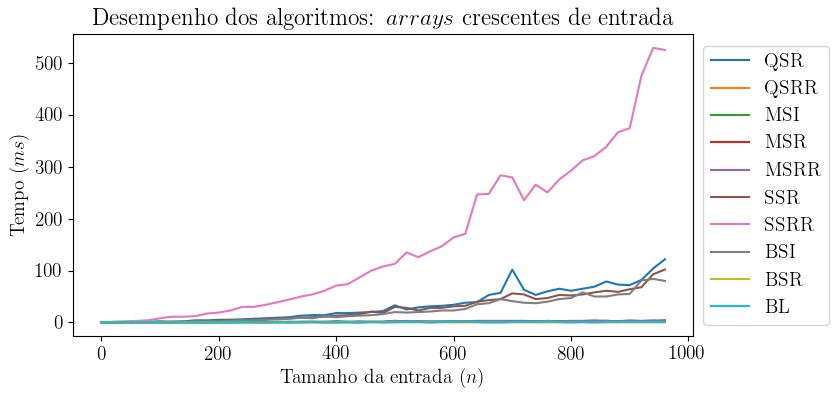

In [10]:
plt.plot(df1.index*20, df1);
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ crescentes de entrada');
plt.legend(df1.columns, loc='center left', bbox_to_anchor=(1, 0.5));

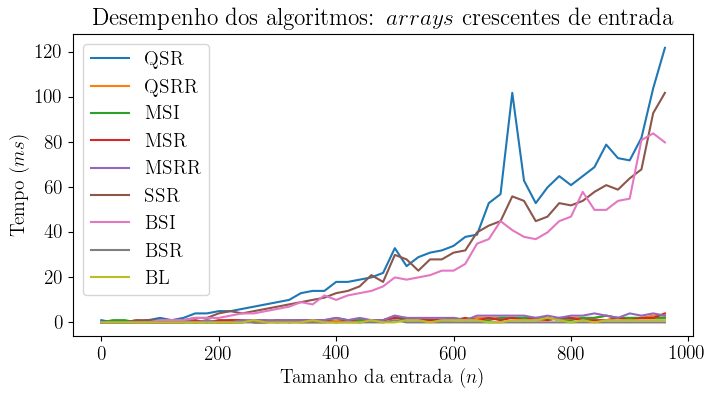

In [11]:
plt.plot(df1.index*20, df1.drop('SSRR', axis=1));
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ crescentes de entrada');

labels = list(df1.columns)
labels.remove('SSRR')

plt.legend(labels);

QSR = 33.55102040816327
QSRR = 1.183673469387755
MSI = 1.1020408163265305
MSR = 1.0204081632653061
MSRR = 1.6938775510204083
SSR = 27.632653061224488
SSRR = 153.3469387755102
BSI = 23.693877551020407
BSR = 0.02040816326530612
BL = 0.4489795918367347



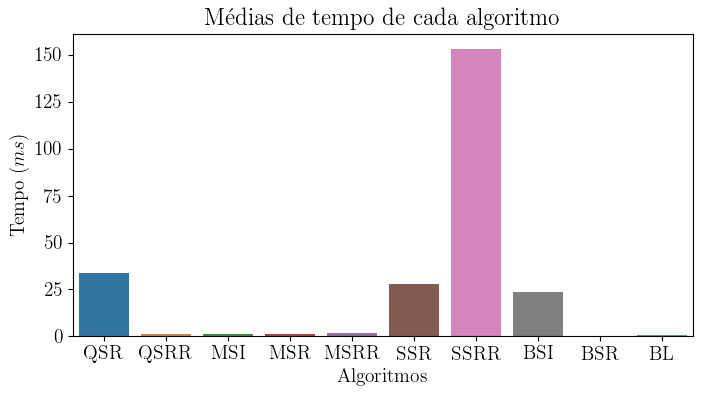

In [12]:
means = []
for column in df1.columns:
    mean = df1[column].mean()
    means.append(mean)
    print(column, '=', mean)

print()
sns.barplot(x=df1.columns, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

Removendo os dados do algoritmo *Selection Sort Recursive Randomized* (SSRR), para melhor visualização

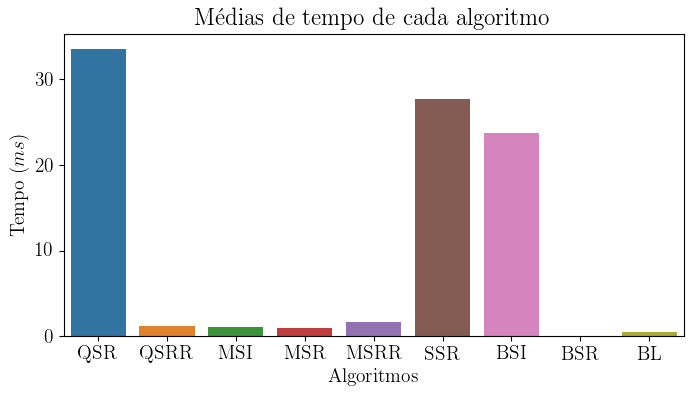

In [13]:
cols = list(df1.columns)
cols.remove('SSRR')

means = []
for column in cols:
    mean = df1[column].mean()
    means.append(mean)

print()
sns.barplot(x=cols, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

## *Arrays* decrescentes

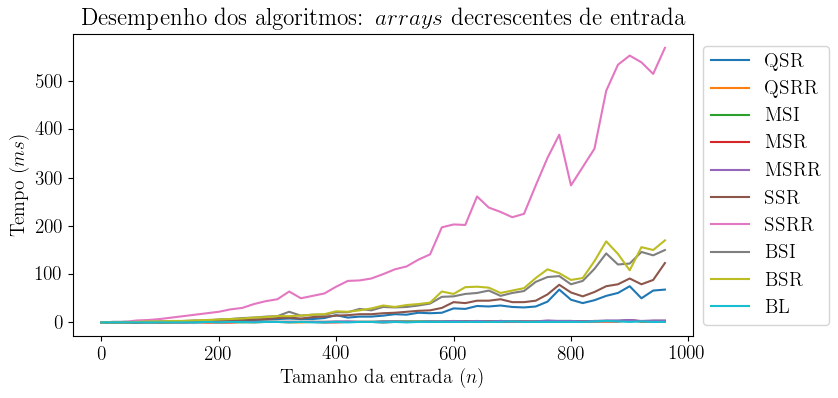

In [14]:
plt.plot(df2.index*20, df2);
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ decrescentes de entrada');
plt.legend(df2.columns, loc='center left', bbox_to_anchor=(1, 0.5));

Removendo os dados do algoritmo *Selection Sort Recursive Randomized* (SSRR), para melhor visualização

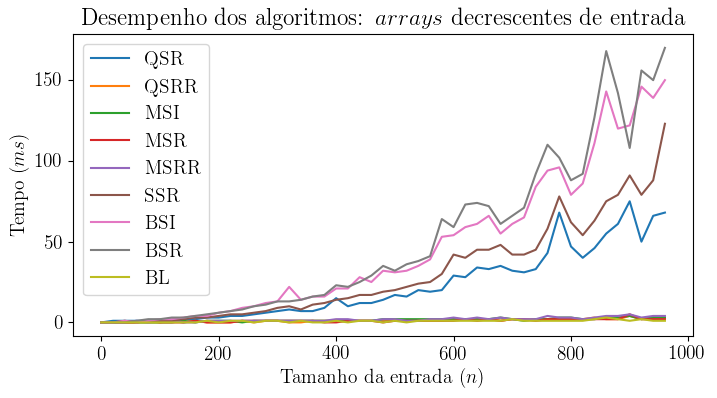

In [15]:
plt.plot(df2.index*20, df2.drop('SSRR', axis=1));
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ decrescentes de entrada');

labels = list(df2.columns)
labels.remove('SSRR')

plt.legend(labels);

QSR = 22.489795918367346
QSRR = 1.2040816326530612
MSI = 1.489795918367347
MSR = 1.1020408163265305
MSRR = 1.7959183673469388
SSR = 30.428571428571427
SSRR = 171.26530612244898
BSI = 45.91836734693877
BSR = 50.224489795918366
BL = 0.7755102040816326



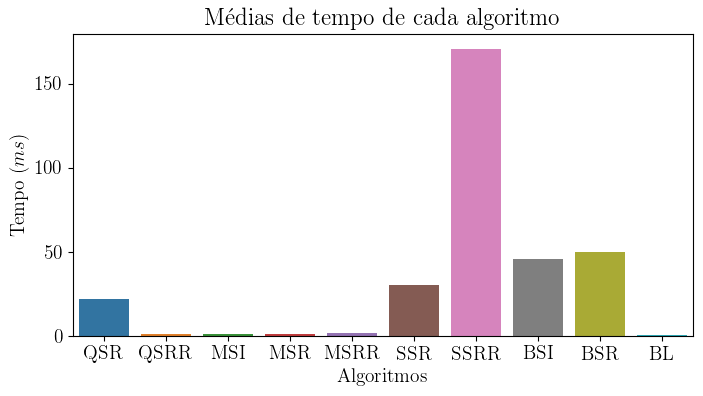

In [16]:
means = []
for column in df2.columns:
    mean = df2[column].mean()
    means.append(mean)
    print(column, '=', mean)

print()
sns.barplot(x=df2.columns, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

Removendo os dados do algoritmo *Selection Sort Recursive Randomized* (SSRR), para melhor visualização

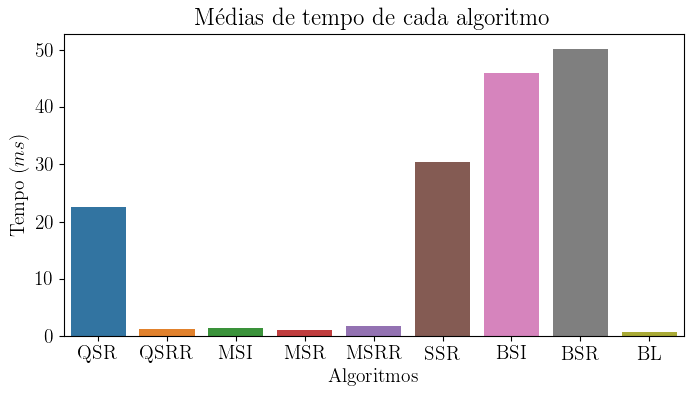

In [17]:
cols = list(df2.columns)
cols.remove('SSRR')

means = []
for column in cols:
    mean = df2[column].mean()
    means.append(mean)

print()
sns.barplot(x=cols, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

## *Arrays* randomizados

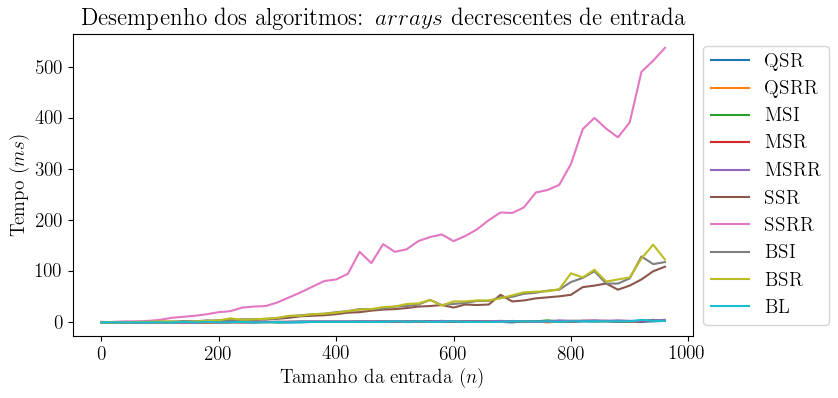

In [18]:
plt.plot(df3.index*20, df3);
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ decrescentes de entrada');
plt.legend(df3.columns, loc='center left', bbox_to_anchor=(1, 0.5));

Removendo os dados do algoritmo *Selection Sort Recursive Randomized* (SSRR), para melhor visualização

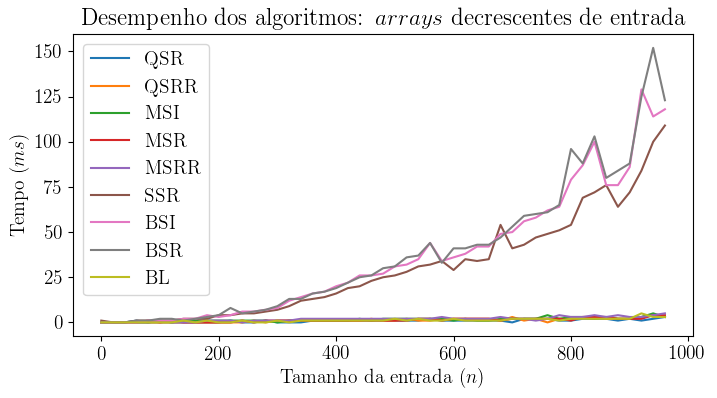

In [19]:
plt.plot(df3.index*20, df3.drop('SSRR', axis=1));
plt.xlabel('Tamanho da entrada ($n$)');
plt.ylabel('Tempo ($ms$)');
plt.title('Desempenho dos algoritmos: $arrays$ decrescentes de entrada');

labels = list(df3.columns)
labels.remove('SSRR')

plt.legend(labels);

QSR = 0.8979591836734694
QSRR = 1.2244897959183674
MSI = 1.530612244897959
MSR = 1.3061224489795917
MSRR = 1.816326530612245
SSR = 29.836734693877553
SSRR = 158.44897959183675
BSI = 35.97959183673469
BSR = 38.06122448979592
BL = 1.163265306122449



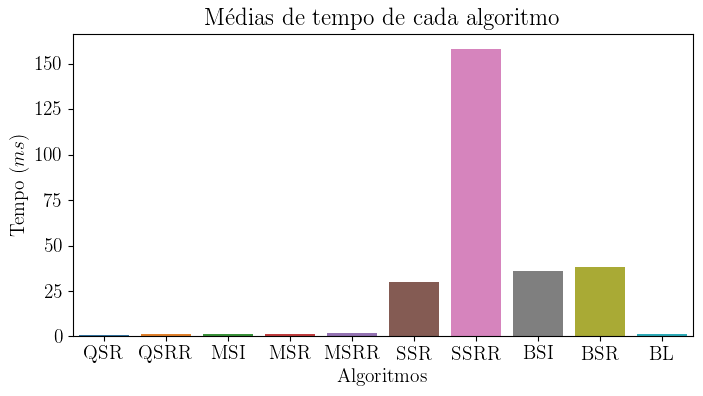

In [20]:
means = []
for column in df3.columns:
    mean = df3[column].mean()
    means.append(mean)
    print(column, '=', mean)

print()
sns.barplot(x=df3.columns, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

Removendo os dados do algoritmo *Selection Sort Recursive Randomized* (SSRR), para melhor visualização

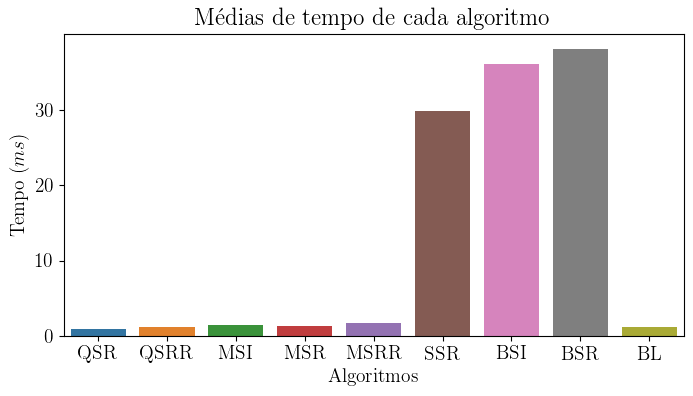

In [21]:
cols = list(df3.columns)
cols.remove('SSRR')

means = []
for column in cols:
    mean = df3[column].mean()
    means.append(mean)

print()
sns.barplot(x=cols, y=means);
plt.title('Médias de tempo de cada algoritmo');
plt.xlabel('Algoritmos');
plt.ylabel('Tempo ($ms$)');

# **PROJETANDO OS ALGORITMOS**

In [22]:
def plot_summary(df, display_latex=True, arrays='crescentes', xp=1250):
    for column in df.columns:
        x = [i*20 for i in range(1,len(df1[column].values)+1)]
        y = df[column].values
        z = np.polyfit(x, y, 2)

        p = np.poly1d(z)
        predicted = [p(i) for i in range(49*20,100*20)]

        coef = list(p)
        if display_latex:
            display(f'Coeficientes de {column}', 
                    coef[0]*x_s**2 + coef[1]*x_s + coef[2])
            print()
        else:
            print('Coeficientes de', column, '=', 
                f'{round(coef[0],2)}x² + {round(coef[1],2)}x + {round(coef[2],2)}')
        
        plt.plot(x, df[column]);

        xl = range(x[-1],((x[-1] + len(predicted))))
        plt.plot(xl,
                predicted,
                linestyle='--',
                label=column);

        prediction = p(xp)
        plt.scatter(xp, prediction, color='r', zorder=11);

    print()
    plt.title(f'Projeção $f(n)$ quadrática dos algoritmos de ordenação: $arrays$ {arrays}');
    plt.xlabel('Tamanho da entrada ($n$)');
    plt.ylabel('Tempo ($ms$)');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
    plt.show();

    print()
    r2_scores = []
    for column in df1.columns:
        x = range(len(df1[column].values))
        y = df1[column].values
        z = np.polyfit(x, y, 2)

        p = np.poly1d(z)
        predicted = [p(i) for i in range(len(df1[column].values))]
        r2 = r2_score(df1[column], predicted)
        r2_scores.append(r2)
        print(column, 'R2', '=', r2)

    print()
    sns.barplot(x=df1.columns, 
                y=r2_scores);

    plt.title('$R2$ score entre $f(n)$ e os algoritmos de ordenação: $20 \leq n \leq 980$');
    plt.xlabel('Algoritmos');
    plt.ylabel('$R2$');
    plt.show();

## *Arrays* ascendentes

'Coeficientes de QSR'

'Coeficientes de QSRR'

'Coeficientes de MSI'

'Coeficientes de MSR'

'Coeficientes de MSRR'

'Coeficientes de SSR'

'Coeficientes de SSRR'

'Coeficientes de BSI'

'Coeficientes de BSR'

'Coeficientes de BL'

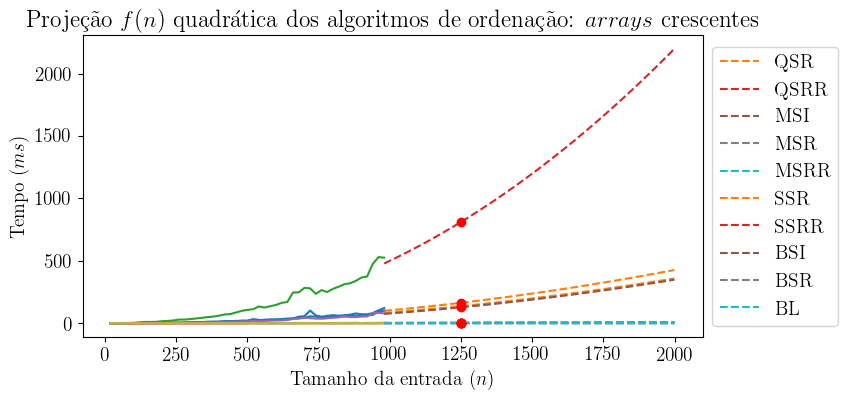


QSR R2 = 0.919640051676808
QSRR R2 = 0.644623063580513
MSI R2 = 0.6599139319061812
MSR R2 = 0.5093999770753046
MSRR R2 = 0.8066029711051859
SSR R2 = 0.9591128544724088
SSRR R2 = 0.9728920939259416
BSI R2 = 0.9651822368906464
BSR R2 = 0.02591833541927413
BL R2 = 0.4095386212534454



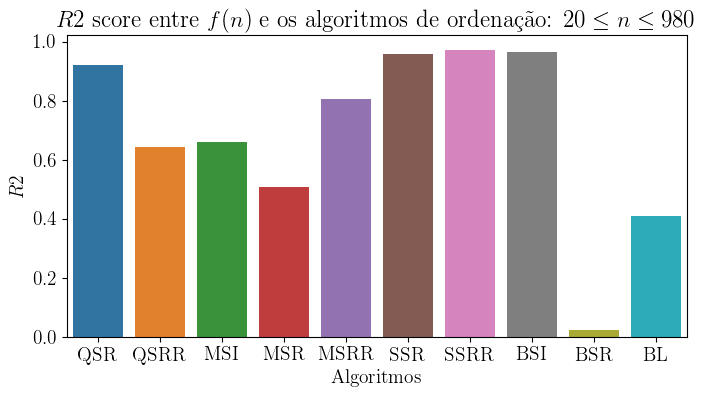

In [23]:
plot_summary(df1, arrays='crescentes')

## *Arrays* descendentes

'Coeficientes de QSR'

'Coeficientes de QSRR'

'Coeficientes de MSI'

'Coeficientes de MSR'

'Coeficientes de MSRR'

'Coeficientes de SSR'

'Coeficientes de SSRR'

'Coeficientes de BSI'

'Coeficientes de BSR'

'Coeficientes de BL'

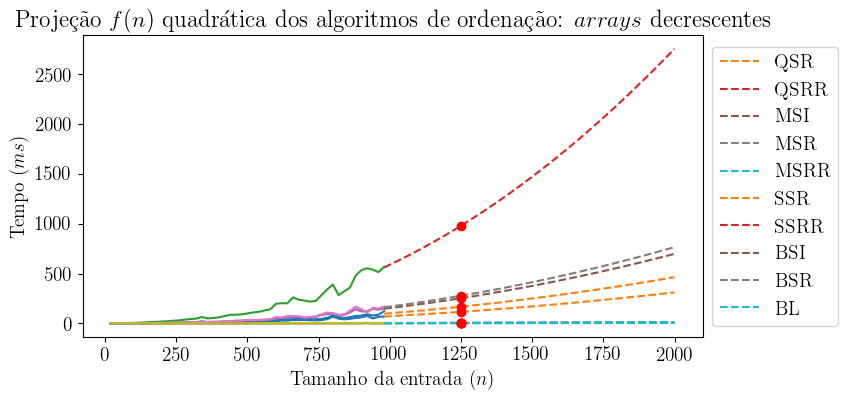


QSR R2 = 0.919640051676808
QSRR R2 = 0.644623063580513
MSI R2 = 0.6599139319061812
MSR R2 = 0.5093999770753046
MSRR R2 = 0.8066029711051859
SSR R2 = 0.9591128544724088
SSRR R2 = 0.9728920939259416
BSI R2 = 0.9651822368906464
BSR R2 = 0.02591833541927413
BL R2 = 0.4095386212534454



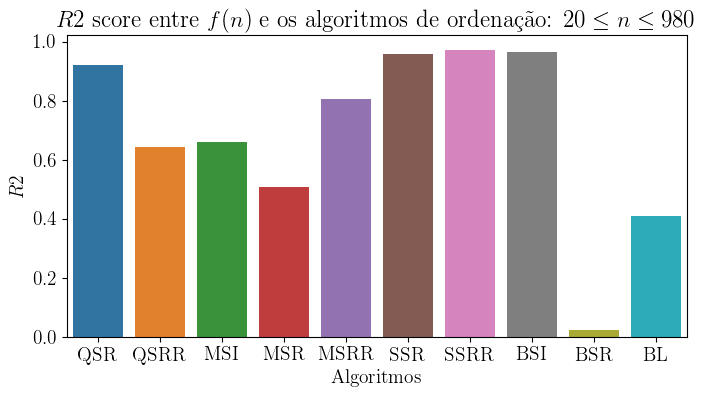

In [24]:
plot_summary(df2, arrays='decrescentes')

## *Arrays* randomizados

'Coeficientes de QSR'

'Coeficientes de QSRR'

'Coeficientes de MSI'

'Coeficientes de MSR'

'Coeficientes de MSRR'

'Coeficientes de SSR'

'Coeficientes de SSRR'

'Coeficientes de BSI'

'Coeficientes de BSR'

'Coeficientes de BL'

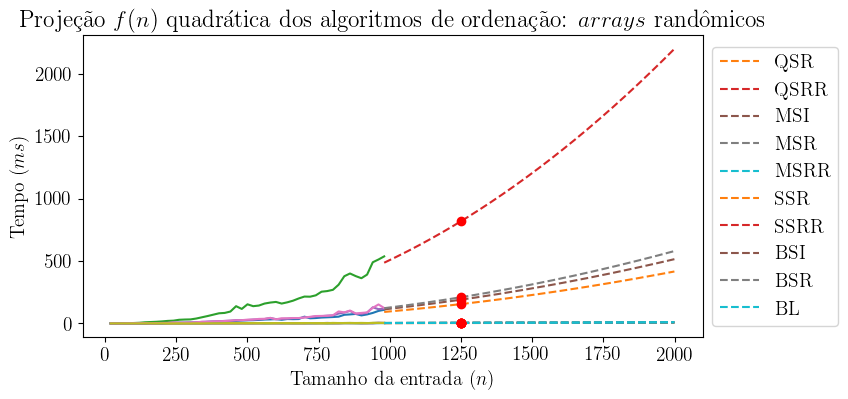


QSR R2 = 0.919640051676808
QSRR R2 = 0.644623063580513
MSI R2 = 0.6599139319061812
MSR R2 = 0.5093999770753046
MSRR R2 = 0.8066029711051859
SSR R2 = 0.9591128544724088
SSRR R2 = 0.9728920939259416
BSI R2 = 0.9651822368906464
BSR R2 = 0.02591833541927413
BL R2 = 0.4095386212534454



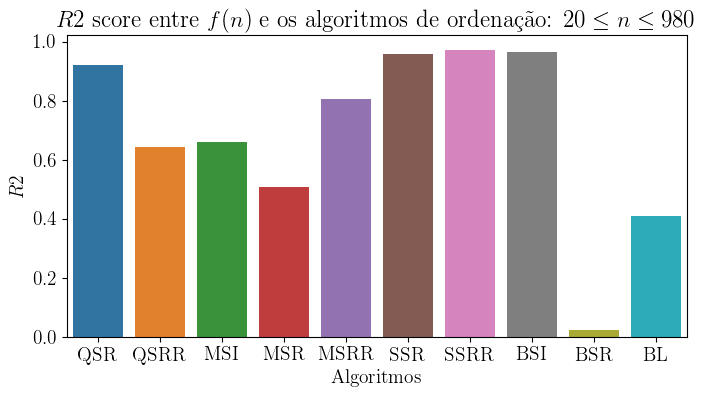

In [25]:
plot_summary(df3, arrays='randômicos')

# **RESUMO**
Desempenhos em termos de tempo de execução

## Para *Arrays* **crescentes** como entrada
- **Melhor algoritmo**: `BSR` (*bubble sort recursive*)
- **Algoritmo médio**: `BSI` (*bubble sort iterative*)
- **Pior algoritmo**: `SSRR` (*selection sort recursive randomized*)

O algoritmo `BSI` é o mais próximo da média geral, em tempo de execução, portanto é o que possui desempenho médio

In [26]:
# médias de tempo
df1.mean()

QSR      33.551020
QSRR      1.183673
MSI       1.102041
MSR       1.020408
MSRR      1.693878
SSR      27.632653
SSRR    153.346939
BSI      23.693878
BSR       0.020408
BL        0.448980
dtype: float64

In [27]:
# média de tempo de todos os algoritmos
print(df1.mean().mean())

24.369387755102043


## Para *Arrays* **decrescentes** como entrada
- **Melhor algoritmo**: `BL` (*shell sort*)
- **Algoritmo médio**: `SSR` (*selection sort recursive*)
- **Pior algoritmo**: `SSRR` (*selection sort recursive randomized*)

O algoritmo `SSR` é o mais próximo da média geral, em tempo de execução, portanto é o que possui desempenho médio

In [28]:
# médias de tempo
df2.mean()

QSR      22.489796
QSRR      1.204082
MSI       1.489796
MSR       1.102041
MSRR      1.795918
SSR      30.428571
SSRR    171.265306
BSI      45.918367
BSR      50.224490
BL        0.775510
dtype: float64

In [29]:
# média de tempo de todos os algoritmos
print(df2.mean().mean())

32.66938775510204


## Para *Arrays* **randômicos** como entrada
- **Melhor algoritmo**: `QSR` (*quick sort recursive*)
- **Algoritmo médio**: `SSR` (*selection sort recursive*)
- **Pior algoritmo**: `SSRR` (*selection sort recursive randomized*)

O algoritmo `SSR` é o mais próximo da média geral, em tempo de execução, portanto é o que possui desempenho médio

In [30]:
# médias de tempo
df3.mean()

QSR       0.897959
QSRR      1.224490
MSI       1.530612
MSR       1.306122
MSRR      1.816327
SSR      29.836735
SSRR    158.448980
BSI      35.979592
BSR      38.061224
BL        1.163265
dtype: float64

In [31]:
# média de tempo de todos os algoritmos
print(df3.mean().mean())

27.026530612244905
